Geo Data Science with Python,
Prof. Susanna Werth, VT Geosciences

---
# Exercise 8: Selecting points inside a boundary

### Content & Grading

You will receive the following points for this exercise:

- **Part A**: *10 P* - <a href='#partA'> Shapely </a>
- **Part B**: *40 P* - <a href='#partB'> Region Statistics for downloaded data </a>
- **Part C**: *30 P* - <a href='#partC'> Data Filtering & SVD </a>

Total: 
- 80 points 
- **up to 15 extra credit points for reasonaby commenting & structuring your code** 

---

### Name and Collaborator
Add your name and the name of any collaborator in the code cell below.

In [1]:
Name = 'Nazmul Huda'
Collaborators = ['Lars', 'Alex']

<div class="alert alert-warning">

**Grades:** 

Total points: **72**/80
    
- Part A: 10/10
- Part B: 40/40
- Part C: 12/30
- ExtCrd: 10/15


Signed: Susanna Werth
    
    
</div>


<div class="alert alert-warning">

**Additional Grading Notes:** 

Some more comments might be provided below for answers without full points. If there are no comments, your answer is correct.
        

    


    
    
</div>



---
---
# Part A: Find out which points locate inside a region
<a id='partA'></a>

In the code cell below, you have given x and y coordiantes of two points p1 and p2 as well as an array containing a nested list of coordinate pairs. The data are defined in a code cell below this task. You are supposed to automatically test, whether the two points lcoate inside the polygon using Python code. For that you have to convert the points and the polygonArray to shapely objects and use the correct shapely function to assing the test result to two variables `test` and `test2`. In detail, perform the following steps:

* Import the objects **Point** and **Polygon** from the package shapely.geometry in the way, that you do not need any prefix to use the objects Point and Polygon (1 point)
* Define two points `p1` and `p2` as shapely Points, given the data below (2 points)
* Convert the polygon given by the variable `polygonArray` to a list of tuples holding coordinate pairs and save them in the variable `PolygonList`. The structure of the list should be appropriate to serve as input for the shapely object Polygon in the next step. (3 points)
* Define a shapely polygon `poly1` using the coordinates stored in `PolygonList` (1 point)
* Check whether point `p1` and point `p2` locate in the polygon `poly1` and assign the test results to the variables `polytest1` and `polytest2`, respectively (2 points)

Fill your code in the answer code cell below. Make sure to comment your code well!!! Use the same variable names as stated in the task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# x and y coordinates of two points, given as numbers
p1_y = 24.952242
p1_x = 60.1696017
p2_y = 24.976567
p2_x = 60.1612500

# x and y coordinates of 4 points defining a polygon, given as a numpy array [y,x]
polygonArray = np.array([[24.950899, 60.169158], [24.953492, 60.169158], [24.953510,60.170104], [24.950958,60.169990]])

In [2]:
### YOUR CODE HERE

# importing shapely which will be used to convert to points and polygon
from shapely.geometry import Point, Polygon

p1 = Point(p1_y, p1_x)
p2 = Point(p2_y, p2_x)

poly1 = Polygon(polygonArray)

Is point 1 within polygon 1:True
Is point 2 within polygon 1:False


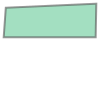

In [7]:
# Print out the results of your test

# within function checks if the point is inside a polygon or not 

polytest1 = p1.within(poly1)
polytest2 = p2.within(poly1)

print('Is point 1 within polygon 1:' + str(polytest1))
print('Is point 2 within polygon 1:' + str(polytest2))


---
# Part B: Calculate statistics for a geographical region
<a id='partB'></a>

In this task, you should retrieve a gridded dataset and calculate mean of one of three variables (surface temperature, snowfall **or** evaporation) within the state of California and Utah, during the month of January 2021.


### You have given:

- Link to the file containing one month GLDAS NOAH model simulations from NASA's GESDISC OpenDAP server defined as url below. Note: the dataset contains only one grid, we will not do any time series analysis, only work with the spatial (lat/lon) dimensions.
- A file containing the boundary of California and Utah: boundary_CA.csv, boundary_UT.csv
- Bounding box of the study region (encompassing both regions and a buffer):
    - minLat = 28
    - maxLat = 45
    - minLon = -124
    - maxLon = -106


### You should do the following:

- Import all needed packages
- Read the boundary files for California and Utah
- Open connection to the netcdf file via pydap and with your EarthData account
- Retrieve information about either of the following variables from the GLDAS dataset: `AvgSurfT_inst`, `Snowf_tavg` or `Evap_tavg`.
- Retrieve metdadata and mappings (lat, lon, ...)
- Download the needed subset of the global dataset, covering the regions of California and Utah. **Note**: you will have to find indices that correspond to coordinates of the bounding box given above.
- Find gridpoints located inside both states using classes and methods of the module shapely, and generate a mask for each of the regions of California and Utah
- The mask should have the same shape as the downloaded datagrid its values should code 1 for gridpoints inside and 0 for gridpoints outside the region.
- Apply the mask to the grid and calculate mean variable (surface temperature, snowfall or evaporation) for both regions. Note: consider a method, that does not include points outside the mask in the mean calculation, e.g. either filter the values first, or set all gridpoints outside the region to nan and use np.nanmean().)
- Make a testplot of your masks, to see if they are correct.
- Generate a separate map of the grided dataset within the bounding box. Plot also the boundaries/polygons of both states.
- Don't forget to comment your code
- Structure your notebook section below into different work steps. Make use of the notebook markdown cells, add sections headers for different steps you are taking, or similar
- In a **mark-down cell** below your code cells, formulate a report answering the questions below.


### Answer the following questions:

- Which dataset did you choose (surface temperature, snowfall **or** evaporation) ?
- What is the fill or missing value of the dataset ?
- What is the unit of the dataset?
- How many grid points locate inside the state of California?
- How many grid points locate inside the state of Utah?
- What is the average surface temperature / snowfall / evaporation during January 2021 in California?
- What is the average surface temperature / snowfall / evaporation during January 2021 in Utah?
- Which state got more snow during that month?


In [7]:
url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GLDAS/GLDAS_CLSM10_M.2.1/2021/GLDAS_CLSM10_M.A202101.021.nc4'

In [8]:
### ADD YOUR CODE & Documentation in cells bellow
### Create your own notebook section structure


#importing the required packages

from netCDF4 import Dataset
import requests
from pydap.client import open_url
from pydap.cas.urs import setup_session
import numpy as np
from shapely.geometry import Point, Polygon


# loading the boundary files
CA_bound = np.genfromtxt("./boundary_CA.csv", delimiter=',', skip_header=1)
UT_bound = np.genfromtxt("./boundary_UT.csv", delimiter=',', skip_header=1)


#account info to download NASA EarthData

username = 'nazmul0310'
password = 'Peyal963258741'
session = setup_session(username, password, check_url=url)
dataset = open_url(url, session = session)


#getting the basic data information and I will work with Snowfall data

dataset.Snowf_tavg,  
dataset.Snowf_tavg.attributes 
dataset.Snowf_tavg.lat



<BaseType with data BaseProxy('https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GLDAS/GLDAS_CLSM10_M.2.1/2021/GLDAS_CLSM10_M.A202101.021.nc4', 'Snowf_tavg.lat', dtype('>f4'), (150,), (slice(None, None, None),))>

In [9]:
## Retrieve information about either of the following variables from the GLDAS dataset: AvgSurfT_inst, Snowf_tavg or Evap_tavg
snowfall = dataset.Snowf_tavg.Snowf_tavg[:].data
timeUnits = dataset.time[:].units
timeVec = dataset.time[:].data
lon = dataset.lon[:].data
lat = dataset.lat[:].data



# downloading the subset data

minLat = 28
maxLat = 45
minLon = -124
maxLon = -106

iminLat=np.argmin(abs(lat-minLat))
imaxLat=np.argmin(abs(lat-maxLat))
iminLon=np.argmin(abs(lon-minLon))
imaxLon=np.argmin(abs(lon-maxLon))

snowfall_sub = dataset.Snowf_tavg.array[0,iminLat:imaxLat,iminLon:imaxLon].data
snowfall_sub.shape

(1, 17, 18)

In [15]:
snowfall.shape

(1, 150, 360)

In [10]:
# checking the fillval

fillVal = dataset.Snowf_tavg.missing_value

fillVal

-9999.0

In [16]:
#converting numpy array to list of tuples for shapely 

CA_bnd_list = []
for i in range(len(CA_bound)):
     CA_bnd_list.append(tuple(CA_bound[i,:]))

UT_bnd_list = []
for i in range(len(UT_bound)):
     UT_bnd_list.append(tuple(UT_bound[i,:]))

#converting list of tuples to shapely poly

CA_poly = Polygon(CA_bnd_list)
UT_poly = Polygon(UT_bnd_list)

In [36]:

        
lon_sub = lon[iminLon:imaxLon]
lat_sub = lat[iminLat:imaxLat]

lonGrid, latGrid = np.meshgrid(lon_sub,lat_sub)

lon_sub, lat_sub

(array([-124.5, -123.5, -122.5, -121.5, -120.5, -119.5, -118.5, -117.5,
        -116.5, -115.5, -114.5, -113.5, -112.5, -111.5, -110.5, -109.5,
        -108.5, -107.5], dtype=float32),
 array([27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5,
        38.5, 39.5, 40.5, 41.5, 42.5, 43.5], dtype=float32))

In [27]:
CAMask = np.zeros(snowfall_sub.shape[1:])
UTMask = np.zeros(snowfall_sub.shape[1:])


# nested loop to check if points inside polygon and fill the mask
# iterate through longitude array
for lon_i in range(len(lon_sub)):

    # iterate through latitude array
    for lat_i in range(len(lat_sub)):
        
        # set current lon/lat
        lon_c = lon_sub[lon_i]  # current longitude coord in iteration
        lat_c = lat_sub[lat_i]  # current latitude coord in iteration
        
        # create current point
        currentPoint = Point(lat_c,lon_c)
        
        # check if point inside: returns true or false
        check = currentPoint.within(UT_poly)
        UTMask[lat_i,lon_i] = int(check)


        
for lon_i in range(len(lon_sub)):

    # iterate through latitude array
    for lat_i in range(len(lat_sub)):
        
        # set current lon/lat
        lon_c = lon_sub[lon_i]  # current longitude coord in iteration
        lat_c = lat_sub[lat_i]  # current latitude coord in iteration
        
        # create current point
        currentPoint = Point(lat_c,lon_c)
        
        # check if point inside: returns true or false
        check = currentPoint.within(CA_poly)
        CAMask[lat_i,lon_i] = int(check)


In [28]:
#Converts from float to integer data type
Utah = UTMask.astype(int)
Cali = CAMask.astype(int)

In [30]:
#getting two dimensional array from a 3dim array
snowfall_a = snowfall_sub[0]
snowfall_a[snowfall_a==-9999.0] = np.nan


CaliSnow = np.ma.masked_array(snowfall_a, Cali)
UtahSnow = np.ma.masked_array(snowfall_a, Utah)

In [31]:
#Finding the number of datapoints within each mask
np.size(CaliSnow[CaliSnow.mask]), np.size(UtahSnow[UtahSnow.mask])

(40, 23)

In [32]:
#looking at the California data

CaliSnow[CaliSnow.mask].data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.2362273e-09, 8.1905247e-09, 1.2626104e-07, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.3379437e-08,
       5.3737201e-09, 0.0000000e+00, 6.9304434e-10, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.0482532e-08, 2.4592572e-08,
       0.0000000e+00, 0.0000000e+00, 7.4909217e-06, 2.6809625e-05,
       0.0000000e+00, 0.0000000e+00, 3.8591133e-06, 3.5665573e-05,
       2.4564595e-06, 4.2447709e-06, 1.8095226e-07, 1.0911012e-05,
       2.5303952e-06, 1.3296600e-05, 6.8029576e-06, 3.7052352e-05,
       7.5751254e-06, 2.8534028e-05, 1.6115164e-05, 3.7924026e-05],
      dtype=float32)

In [33]:
#looking at the utah data

UtahSnow[UtahSnow.mask].data

array([9.77743730e-06, 8.62750858e-06, 6.49282265e-06, 5.52843176e-06,
       7.37184610e-06, 8.67529434e-06, 6.66875712e-06, 6.42771784e-06,
       6.41129418e-06, 6.16508987e-06, 8.36023355e-06, 1.20830300e-05,
       9.07875528e-06, 9.65723939e-06, 4.92809932e-06, 7.02627813e-06,
       7.29284966e-06, 1.36067201e-05, 8.41818837e-06, 7.33344496e-06,
       8.56623319e-06, 8.84421843e-06, 1.18372045e-05], dtype=float32)

In [34]:
#calculating the mean snowfall of the two area 

np.mean(CaliSnow[CaliSnow.mask].data), np.mean(UtahSnow[UtahSnow.mask].data)

(6.042232e-06, 8.225162e-06)

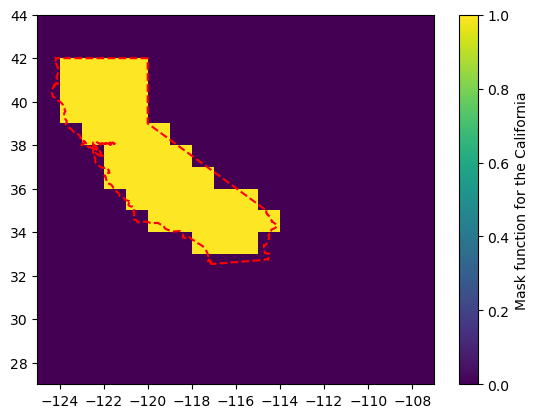

In [38]:
# Make a testplot of your masks, to see if they are correct (California)


# plotting the california mask
plt.pcolormesh(lonGrid,latGrid, CAMask, shading='auto')

# plotting the california boundaries
plt.plot(CA_bound[:,1], CA_bound[:,0], 'r--')

# adding colorbar and label for the colorbar
cbar = plt.colorbar()
cbar.set_label('Mask function for the California')

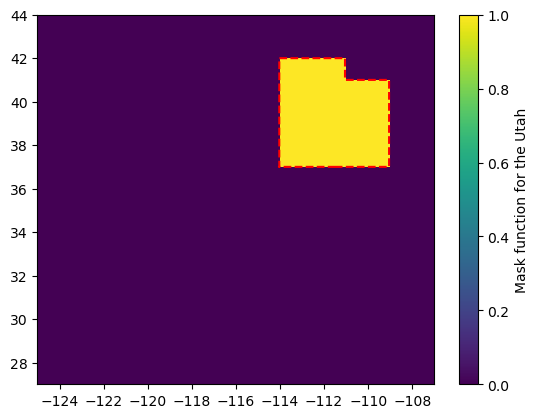

In [39]:
# Make a testplot of your masks, to see if they are correct (utah)


# plotting the utah mask
plt.pcolormesh(lonGrid,latGrid, UTMask, shading='auto')

# plotting the utah boundaries 
plt.plot(UT_bound[:,1], UT_bound[:,0], 'r--')

# adding colorbar and label for the colorbar
cbar = plt.colorbar()
cbar.set_label('Mask function for the Utah')

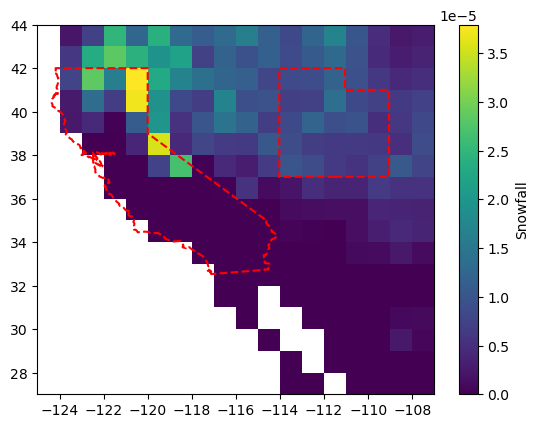

In [44]:
# Generate a separate map of the grided dataset within the bounding box. Plot also the boundaries/polygons of both states

# plotting the gridded subset mask
plt.pcolormesh(lonGrid,latGrid, snowfall_sub[0], shading='auto')

# plotting the CA & UT boundaries (CaBnd) 
plt.plot(UT_bound[:,1], UT_bound[:,0], 'r--')
plt.plot(CA_bound[:,1], CA_bound[:,0], 'r--')


# adding colorbar and label for the colorbar
cbar = plt.colorbar()
cbar.set_label('Snowfall')



#### Add your report of results in this markdown cell

I chose to do this assignment with Snowfall data. 

The fillvalue is: -9999.0

The unit is: kg m-2 s-1

Points inside California: 40
Points inside Utah: 23

The average snowfall during January 2021 in California: 6.042232e-06 kg m-2 s-1

The average snowfall during January 2021 in Utah: 8.225162e-06 kg m-2 s-1

Utah got more snow during that month. 



# Part C: Data Matrix Filtering & SVD
<a id='partC'></a>

**Task 1.** Perform a singular value decomposition SVD and extract the features and loadings (major temporal and spatial components) for the `tos` data set: `~/data/tos_O1_2001-2002.nc`. Exclude the land cells, before performing the decomposition. For that, filter the data matrix X in a way that all land cells are excluded (using a spatial mask), before performing the SVD.



**Task 2.** (optional) Perform a singular value decomposition SVD and extract the features and loadings (major temporal and spatial components) for the `gistemp` data set, during the years 2000-2022: `~/data/gistemp250_GHCNv4.nc`. This time, exclude the ocean cells. 

Comment your code and results. Write a few sentences, how you interpret the results?

In [20]:
# ADD YOUR CODE FOR TASK 1

from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt


# Import the dataset and assign to variables
# filename = 'tos_O1_2001-2002.nc'
# data = Dataset(filename, mode='r')

data = Dataset('tos_O1_2001-2002.nc')
c_tos = data.variables['tos'][:]
c_lat = data.variables['lat'][:].data
c_lon = data.variables['lon'][:].data
c_tos_data = data.variables['tos'][:].data
c_tos_mask = data.variables['tos'][:].mask
data.close()

filt_data = np.where(c_tos_data < 1e19, c_tos_data, 0) #filters out continental values

In [21]:
#Perform SVD
U, S, V = np.linalg.svd(filt_data.data,full_matrices = True ) # full SVD

In [22]:
U.shape, S.shape, V.shape

((24, 170, 170), (24, 170), (24, 180, 180))

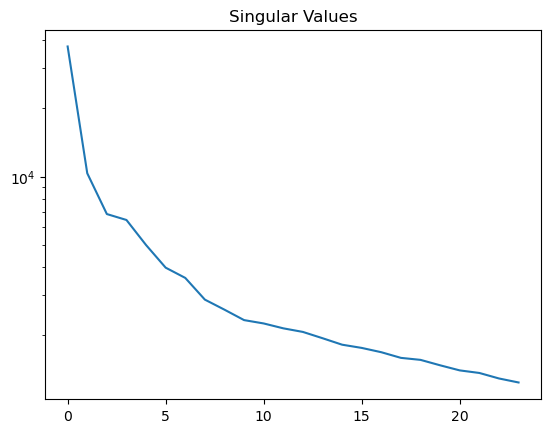

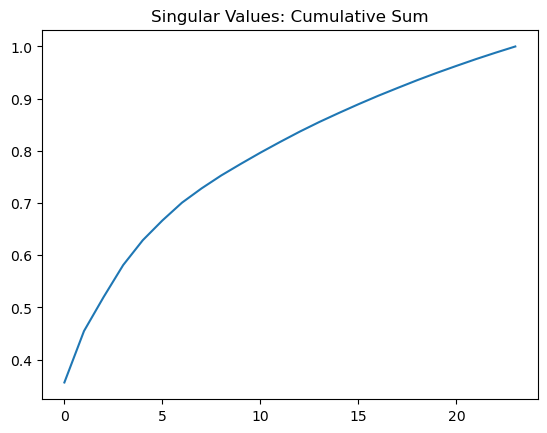

In [23]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

#### Add your interpretation of results for task 1

array([-2.63157895e-01, -2.36842105e-01, -2.10526316e-01, -1.84210526e-01,
       -1.57894737e-01, -1.31578947e-01, -1.05263158e-01, -7.89473684e-02,
       -5.26315789e-02, -2.63157895e-02, -1.38777878e-17,  2.63157895e-02,
        5.26315789e-02,  7.89473684e-02,  1.05263158e-01,  1.31578947e-01,
        1.57894737e-01,  1.84210526e-01,  2.10526316e-01,  2.36842105e-01,
        2.63157895e-01])

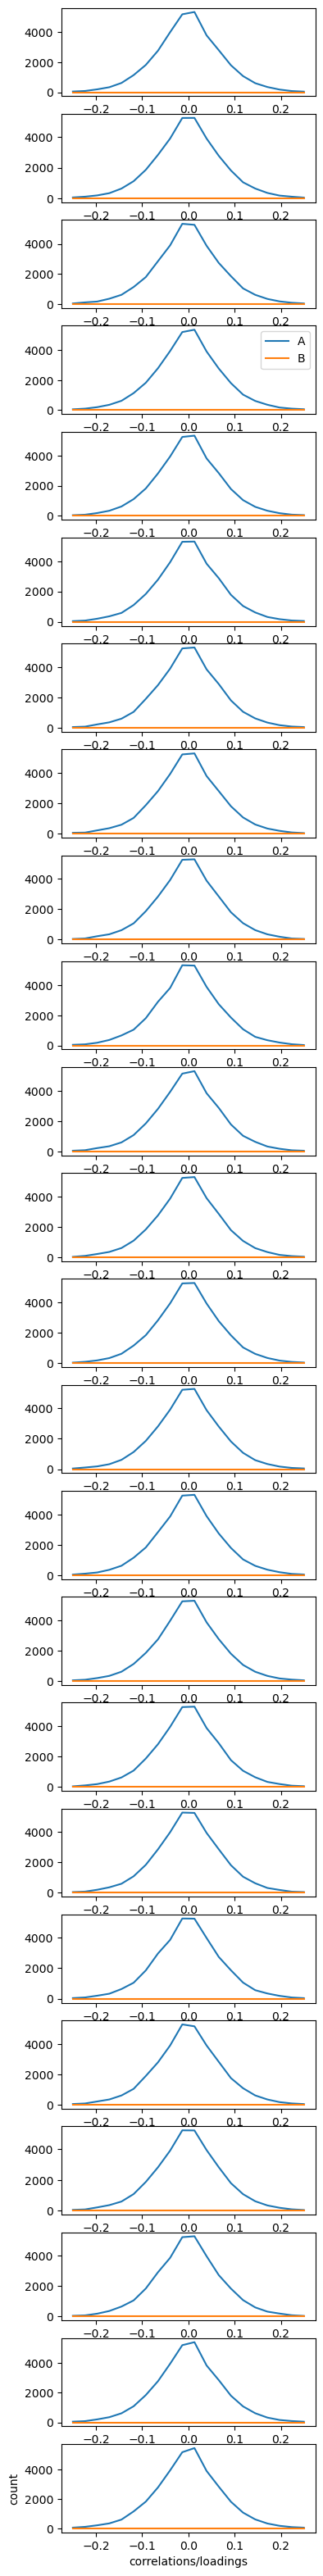

In [24]:
# retrieving historgrams of the loadings V
# split historgram into dogs and cats

plt.rcParams['figure.figsize'] = [4, 40]
plt.rcParams.update({'font.size': 10})
xbin = np.linspace(-0.25,0.25,20)
xbin_edges = np.append(xbin,xbin[-1]+(xbin[1]-xbin[0])) - (xbin[1]-xbin[0])/2
fig,axs = plt.subplots(24,1)
for j in range(24):
    pdf1 = np.histogram(V[j,:180],bins=xbin_edges)[0]
    pdf2 = np.histogram(V[j,180:],bins=xbin_edges)[0]
    axs[j].plot(xbin,pdf1,label ='A')
    axs[j].plot(xbin,pdf2,label ='B')
    if j==3:
        axs[j].legend()
        plt.xlabel('correlations/loadings')
        plt.ylabel('count')

xbin_edges

#### Add your interpretation of results for task 1

There are 24 loadings. From the cumulative sum singular values, I understand that with increasing loadings the the results get better as the curve increase gradually. 

NB: There are some part I don't understand, and I tried to replicate what you have shown in the class note. 

<div class="alert alert-warning">

**Additional Grading Notes:** 

Plot of the main spatial and temporal components are missing. NaN values are filtered, but not put back to a map to be plotted.
    
</div>

